In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
questions = pd.read_csv('QueryResults.csv', parse_dates=['CreationDate'])

In [3]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7700 entries, 0 to 7699
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             7700 non-null   int64         
 1   PostTypeId     7700 non-null   int64         
 2   CreationDate   7700 non-null   datetime64[ns]
 3   Score          7700 non-null   int64         
 4   ViewCount      7700 non-null   int64         
 5   Tags           7700 non-null   object        
 6   AnswerCount    7700 non-null   int64         
 7   FavoriteCount  1521 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 481.4+ KB


In [4]:
questions['Tags']

0                                        <python><pandas>
1         <python><keras><matrix-factorisation><indexing>
2       <keras><tensorflow><image-classification><mult...
3                        <python><statistics><matplotlib>
4       <clustering><bigdata><k-means><distance><hiera...
                              ...                        
7695    <unsupervised-learning><anomaly-detection><unb...
7696                         <deep-learning><cnn><kernel>
7697                                   <machine-learning>
7698              <machine-learning><clustering><dataset>
7699      <machine-learning><keras><image-classification>
Name: Tags, Length: 7700, dtype: object

In [5]:
questions.fillna(value={'FavoriteCount': 0}, inplace=True)
questions['FavoriteCount'] = questions['FavoriteCount'].astype(int)
questions.dtypes

Id                        int64
PostTypeId                int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int64
dtype: object

In [6]:
questions['Tags'] = questions['Tags'].str.replace("^<|>$", "").str.split("><")

In [7]:
questions["Tags"]

0                                        [python, pandas]
1         [python, keras, matrix-factorisation, indexing]
2       [keras, tensorflow, image-classification, mult...
3                        [python, statistics, matplotlib]
4       [clustering, bigdata, k-means, distance, hiera...
                              ...                        
7695    [unsupervised-learning, anomaly-detection, unb...
7696                         [deep-learning, cnn, kernel]
7697                                   [machine-learning]
7698              [machine-learning, clustering, dataset]
7699      [machine-learning, keras, image-classification]
Name: Tags, Length: 7700, dtype: object

In [8]:
tag_count = dict()

for tags in questions['Tags']:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

In [9]:
dict

dict

In [10]:
tag_count

{'python': 1609,
 'pandas': 335,
 'keras': 814,
 'matrix-factorisation': 17,
 'indexing': 5,
 'tensorflow': 490,
 'image-classification': 185,
 'multilabel-classification': 83,
 'statistics': 201,
 'matplotlib': 71,
 'clustering': 245,
 'bigdata': 74,
 'k-means': 78,
 'distance': 41,
 'hierarchical-data-format': 6,
 'similarity': 62,
 'deep-learning': 1035,
 'nlp': 439,
 'loss-function': 148,
 'transformer': 42,
 'neural-network': 930,
 'cnn': 422,
 'convolution': 83,
 'backpropagation': 55,
 'reference-request': 15,
 'gan': 72,
 'generative-models': 39,
 'feature-selection': 186,
 'xgboost': 157,
 'lightgbm': 23,
 'r': 233,
 'data': 188,
 'sql': 25,
 'json': 7,
 'lstm': 322,
 'forecasting': 67,
 'arima': 11,
 'attention-mechanism': 24,
 'word-embeddings': 104,
 'machine-learning': 2375,
 'word2vec': 69,
 'doc2vec': 3,
 'natural-language-process': 105,
 'topic-model': 26,
 'lda': 24,
 'categorical-data': 73,
 'azure-ml': 10,
 'orange': 58,
 'machine-learning-model': 199,
 'aws': 13,
 '

In [11]:
tag_count = pd.DataFrame.from_dict(tag_count, orient="index")

In [12]:
tag_count

,0
python,1609
pandas,335
keras,814
matrix-factorisation,17
indexing,5
...,...
google-cloud,1
multivariate-distribution,1
spyder,1
sports,2


In [13]:
tag_count.rename(columns={0: 'Count'}, inplace=True)

In [14]:
tag_count

,Count
python,1609
pandas,335
keras,814
matrix-factorisation,17
indexing,5
...,...
google-cloud,1
multivariate-distribution,1
spyder,1
sports,2


In [15]:
most_used = tag_count.sort_values(by="Count").tail(20)

In [16]:
most_used

,Count
machine-learning-model,199
statistics,201
r,233
predictive-modeling,234
clustering,245
dataset,294
regression,307
lstm,322
pandas,335
time-series,378


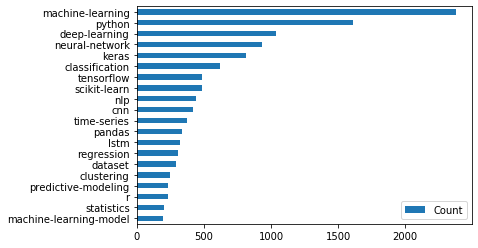

In [17]:
most_used.plot(kind="barh")

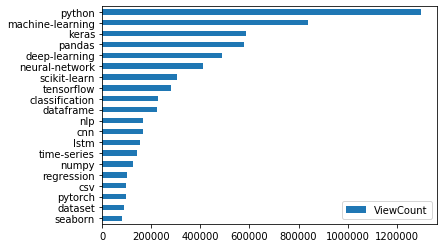

In [18]:
tag_view_count = dict()

for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']
            
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0: 'ViewCount'}, inplace=True)

most_viewed = tag_view_count.sort_values(by="ViewCount").tail(20)
most_viewed.plot(kind="barh")

In [19]:
tag_view_count

,ViewCount
python,1298021
pandas,578812
keras,585093
matrix-factorisation,1159
indexing,8768
...,...
google-cloud,97
multivariate-distribution,8
spyder,1087
sports,50


In [20]:
in_used = pd.merge(most_used, most_viewed, how='left', left_index=True, right_index=True)
in_viewed = pd.merge(most_used, most_viewed, how='right', left_index=True, right_index=True)

In [21]:
in_used

,Count,ViewCount
machine-learning-model,199,NaN
statistics,201,NaN
r,233,NaN
predictive-modeling,234,NaN
clustering,245,NaN
dataset,294,89531.0
regression,307,101782.0
lstm,322,154061.0
pandas,335,578812.0
time-series,378,140144.0


In [22]:
in_viewed

,Count,ViewCount
seaborn,NaN,80091
dataset,294.0,89531
pytorch,NaN,95636
csv,NaN,95881
regression,307.0,101782
numpy,NaN,125293
time-series,378.0,140144
lstm,322.0,154061
cnn,422.0,164660
nlp,439.0,165905


In [23]:
all_tags = list(tag_count.index)
all_tags

['python',
 'pandas',
 'keras',
 'matrix-factorisation',
 'indexing',
 'tensorflow',
 'image-classification',
 'multilabel-classification',
 'statistics',
 'matplotlib',
 'clustering',
 'bigdata',
 'k-means',
 'distance',
 'hierarchical-data-format',
 'similarity',
 'deep-learning',
 'nlp',
 'loss-function',
 'transformer',
 'neural-network',
 'cnn',
 'convolution',
 'backpropagation',
 'reference-request',
 'gan',
 'generative-models',
 'feature-selection',
 'xgboost',
 'lightgbm',
 'r',
 'data',
 'sql',
 'json',
 'lstm',
 'forecasting',
 'arima',
 'attention-mechanism',
 'word-embeddings',
 'machine-learning',
 'word2vec',
 'doc2vec',
 'natural-language-process',
 'topic-model',
 'lda',
 'categorical-data',
 'azure-ml',
 'orange',
 'machine-learning-model',
 'aws',
 'distributed',
 'text-mining',
 'tfidf',
 'naive-bayes-classifier',
 'pipelines',
 'image-recognition',
 'classification',
 'decision-trees',
 'information-theory',
 'text',
 'embeddings',
 'multiclass-classification',
 '

In [24]:
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations

,python,pandas,keras,matrix-factorisation,indexing,tensorflow,image-classification,multilabel-classification,statistics,matplotlib,...,efficiency,lime,adaboost,consumerweb,automl,google-cloud,multivariate-distribution,spyder,sports,frequentist
python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pandas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
keras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
matrix-factorisation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
indexing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
google-cloud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
multivariate-distribution,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
spyder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sports,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
associations.fillna(0, inplace=True)

for tags in questions['Tags']:
    associations.loc[tags, tags] += 1

In [26]:
relations_most_used = associations.loc[most_used.index, most_used.index]
relations_most_used

,machine-learning-model,statistics,r,predictive-modeling,clustering,dataset,regression,lstm,pandas,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,199,3,6,18,3,11,8,3,3,5,3,4,16,8,21,13,9,16,34,125
statistics,3,201,10,14,3,14,14,1,2,16,1,3,4,0,16,1,10,11,32,81
r,6,10,233,11,16,6,8,3,2,18,2,3,1,1,8,10,8,4,22,54
predictive-modeling,18,14,11,234,0,7,25,10,4,26,5,0,12,4,26,11,10,26,30,109
clustering,3,3,16,0,245,5,2,3,5,19,0,9,22,0,12,0,6,2,45,57
dataset,11,14,6,7,5,294,5,5,10,4,10,10,6,8,23,9,17,23,48,88
regression,8,14,8,25,2,5,307,10,6,20,4,2,37,8,31,28,42,20,55,111
lstm,3,1,3,10,3,5,10,322,6,66,20,16,1,30,15,111,56,79,48,50
pandas,3,2,2,4,5,10,6,6,335,17,1,3,36,3,3,3,1,1,231,60
time-series,5,16,18,26,19,4,20,66,17,378,7,0,9,8,21,41,29,34,81,114


In [27]:
associations

,python,pandas,keras,matrix-factorisation,indexing,tensorflow,image-classification,multilabel-classification,statistics,matplotlib,...,efficiency,lime,adaboost,consumerweb,automl,google-cloud,multivariate-distribution,spyder,sports,frequentist
python,1609,231,242,1,2,137,21,13,32,42,...,0,1,1,0,0,0,0,1,0,0
pandas,231,335,3,0,2,3,1,0,2,13,...,0,0,0,0,0,0,0,0,0,0
keras,242,3,814,1,1,228,42,12,1,2,...,0,0,0,0,0,0,0,0,0,0
matrix-factorisation,1,0,1,17,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
indexing,2,2,1,1,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
google-cloud,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
multivariate-distribution,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
spyder,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
sports,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0


In [28]:
questions['Tags']

0                                        [python, pandas]
1         [python, keras, matrix-factorisation, indexing]
2       [keras, tensorflow, image-classification, mult...
3                        [python, statistics, matplotlib]
4       [clustering, bigdata, k-means, distance, hiera...
                              ...                        
7695    [unsupervised-learning, anomaly-detection, unb...
7696                         [deep-learning, cnn, kernel]
7697                                   [machine-learning]
7698              [machine-learning, clustering, dataset]
7699      [machine-learning, keras, image-classification]
Name: Tags, Length: 7700, dtype: object

In [29]:
tag_count

,Count
python,1609
pandas,335
keras,814
matrix-factorisation,17
indexing,5
...,...
google-cloud,1
multivariate-distribution,1
spyder,1
sports,2


In [30]:
relations_most_used.shape

(20, 20)

In [31]:
import numpy as np

for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i, i] = pd.np.NaN

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.


In [32]:
relations_most_used

,machine-learning-model,statistics,r,predictive-modeling,clustering,dataset,regression,lstm,pandas,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,NaN,3.0,6.0,18.0,3.0,11.0,8.0,3.0,3.0,5.0,3.0,4.0,16.0,8.0,21.0,13.0,9.0,16.0,34.0,125.0
statistics,3.0,NaN,10.0,14.0,3.0,14.0,14.0,1.0,2.0,16.0,1.0,3.0,4.0,0.0,16.0,1.0,10.0,11.0,32.0,81.0
r,6.0,10.0,NaN,11.0,16.0,6.0,8.0,3.0,2.0,18.0,2.0,3.0,1.0,1.0,8.0,10.0,8.0,4.0,22.0,54.0
predictive-modeling,18.0,14.0,11.0,NaN,0.0,7.0,25.0,10.0,4.0,26.0,5.0,0.0,12.0,4.0,26.0,11.0,10.0,26.0,30.0,109.0
clustering,3.0,3.0,16.0,0.0,NaN,5.0,2.0,3.0,5.0,19.0,0.0,9.0,22.0,0.0,12.0,0.0,6.0,2.0,45.0,57.0
dataset,11.0,14.0,6.0,7.0,5.0,NaN,5.0,5.0,10.0,4.0,10.0,10.0,6.0,8.0,23.0,9.0,17.0,23.0,48.0,88.0
regression,8.0,14.0,8.0,25.0,2.0,5.0,NaN,10.0,6.0,20.0,4.0,2.0,37.0,8.0,31.0,28.0,42.0,20.0,55.0,111.0
lstm,3.0,1.0,3.0,10.0,3.0,5.0,10.0,NaN,6.0,66.0,20.0,16.0,1.0,30.0,15.0,111.0,56.0,79.0,48.0,50.0
pandas,3.0,2.0,2.0,4.0,5.0,10.0,6.0,6.0,NaN,17.0,1.0,3.0,36.0,3.0,3.0,3.0,1.0,1.0,231.0,60.0
time-series,5.0,16.0,18.0,26.0,19.0,4.0,20.0,66.0,17.0,NaN,7.0,0.0,9.0,8.0,21.0,41.0,29.0,34.0,81.0,114.0


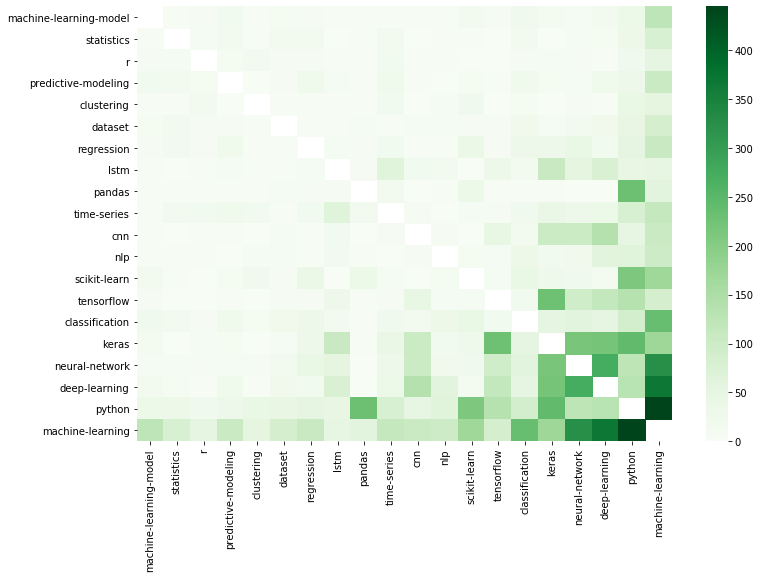

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Greens", annot=False)

In [34]:
all_q = pd.read_csv('AllQuestions.csv', parse_dates=['CreationDate'])

In [35]:
all_q['Tags'] = all_q['Tags'].str.replace("^<|>$", "").str.split("><")

In [36]:
def deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
    return 0

In [37]:
all_q['DeepLearning'] = all_q['Tags'].apply(deep_learning)

In [38]:
all_q.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount,DeepLearning
0,32117,2018-05-24 15:53:57,1,18,"[statistics, transfer-learning, domain-adaptat...",0,NaN,0
1,32121,2018-05-24 17:00:40,2,71,"[machine-learning, neural-network, deep-learni...",2,NaN,1
2,32126,2018-05-24 18:19:22,18,15273,"[python, time-series, anomaly-detection]",3,15.0,0
3,32128,2018-05-24 18:42:20,6,292,"[regression, optimization, gan, generative-mod...",1,2.0,0
4,32129,2018-05-24 19:50:32,2,549,[decision-trees],0,NaN,0


In [39]:
all_q = all_q[all_q['CreationDate'].dt.year < 2020]

In [40]:
def quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_q['Quarter'] = all_q['CreationDate'].apply(quarter)

In [41]:
all_q.head()
all_q

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount,DeepLearning,Quarter
0,32117,2018-05-24 15:53:57,1,18,"[statistics, transfer-learning, domain-adaptat...",0,NaN,0,18Q2
1,32121,2018-05-24 17:00:40,2,71,"[machine-learning, neural-network, deep-learni...",2,NaN,1,18Q2
2,32126,2018-05-24 18:19:22,18,15273,"[python, time-series, anomaly-detection]",3,15.0,0,18Q2
3,32128,2018-05-24 18:42:20,6,292,"[regression, optimization, gan, generative-mod...",1,2.0,0,18Q2
4,32129,2018-05-24 19:50:32,2,549,[decision-trees],0,NaN,0,18Q2
...,...,...,...,...,...,...,...,...,...
25423,17470,2017-03-09 12:33:59,6,1116,"[machine-learning, python, data-mining, pandas]",1,0.0,0,17Q1
25424,17471,2017-03-09 13:17:33,11,3706,"[feature-extraction, unsupervised-learning, gan]",3,2.0,0,17Q1
25425,17479,2017-03-09 21:13:23,0,196,[orange],2,1.0,0,17Q1
25426,17480,2017-03-09 22:30:51,1,176,[embeddings],0,NaN,0,17Q1


In [42]:
quarterly = all_q.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})
quarterly

DeepLearning      
                 sum  size
Quarter                   
14Q2               9   157
14Q3              13   188
14Q4              21   214
15Q1              18   190
15Q2              28   284
15Q3              45   311
15Q4              66   382
16Q1             110   516
16Q2             109   517
16Q3             161   584
16Q4             177   527
17Q1             242   696
17Q2             225   645
17Q3             246   712
17Q4             352   895
18Q1             555  1219
18Q2             569  1442
18Q3             675  1483
18Q4             530  1291
19Q1             711  1762
19Q2             683  1830
19Q3             812  2095
19Q4             801  2013

In [43]:
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly['DeepLearningRate'] = quarterly['DeepLearningQuestions'] / quarterly['TotalQuestions']

In [44]:
quarterly

,DeepLearningQuestions,TotalQuestions,DeepLearningRate
Quarter,,,
14Q2,9,157,0.057325
14Q3,13,188,0.069149
14Q4,21,214,0.098131
15Q1,18,190,0.094737
15Q2,28,284,0.098592
15Q3,45,311,0.144695
15Q4,66,382,0.172775
16Q1,110,516,0.213178
16Q2,109,517,0.210832
